# Deep Learning Project
In this notebook, we will use a deep learning model to predict a target variable. We will be using the [Fashion MNIST dataset](https://www.kaggle.com/zalando-research/fashionmnist) from Kaggle. This dataset contains 70,000 grayscale images of 28x28 pixels, each belonging to one of 10 classes of clothing items.


## Fashion MNIST Dataset
The [Fashion MNIST dataset](https://www.kaggle.com/zalando-research/fashionmnist) is a dataset of 70,000 grayscale images of 28x28 pixels, each belonging to one of 10 classes of clothing items. The dataset is an alternative to the original MNIST dataset, which contains handwritten digits. Fashion MNIST is designed to serve as a drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.

### Features
- **pixel1, pixel2, ..., pixel784**: These columns represent the grayscale pixel values of the 28x28 images, with values ranging from 0 to 255. Each column corresponds to a specific pixel location in the image.

### Target Variable
- **label**: The target variable is the clothing item category, represented as an integer from 0 to 9, where each integer corresponds to a specific clothing item class. The class labels are:

  0. T-shirt/top
  1. Trouser
  2. Pullover
  3. Dress
  4. Coat
  5. Sandal
  6. Shirt
  7. Sneaker
  8. Bag
  9. Ankle boot

### Business Case
A fashion retailer may want to automatically categorize new clothing items into the correct categories for better inventory management and to improve the customer shopping experience on their website. By using the Fashion MNIST dataset to train a deep learning model, the retailer can create an automatic image classification system that can quickly and accurately categorize new clothing items, saving time and resources while improving the online shopping experience for customers.


In [2]:
#!pip install tensorflow
#!pip install keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [3]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model

print("Num GPUs Available:", len(tf.config.list_physical_devices("GPU")))


Num GPUs Available: 1


In [4]:
# Load the dataset
train_data = pd.read_csv("fashion-mnist_train.csv")
test_data = pd.read_csv("fashion-mnist_test.csv")


In [5]:
# Explore the dataset
train_data.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing the data
We need to prepare the data for the deep learning model. This involves converting the pixel values to a suitable range, reshaping the input data, and converting the target variable to a one-hot encoded format.


In [6]:
# Split the data into features and labels
X_train = train_data.drop("label", axis=1)
y_train = train_data["label"]
X_test = test_data.drop("label", axis=1)
y_test = test_data["label"]

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

# One-hot encode the target variable
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

### Building the deep learning model
We will now build the deep learning model using Keras. We will use a Convolutional Neural Network (CNN) architecture for this problem.


In [7]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [10]:
#!pip install pydot
#!pip install graphviz
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Training the deep learning model

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10


## Evaluating the model

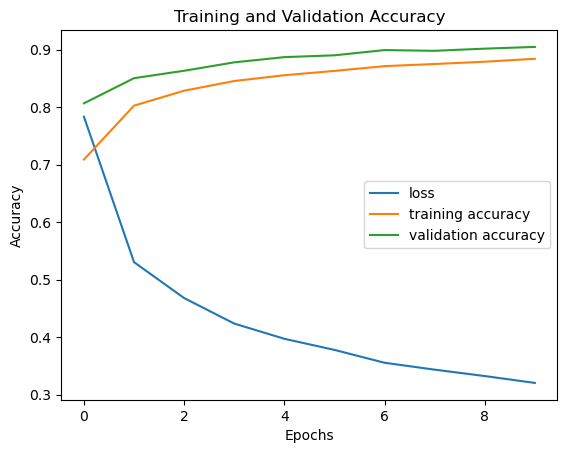

In [18]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='loss')
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model Improvement

### Data augmentation

Apply random transformations to the images, such as rotation, zoom, and horizontal flip, to increase the diversity of the training dataset. This helps the model generalize better to unseen data.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

### Experiment with different model architectures
Add or remove layers, change the number of filters, or modify the kernel size to find a better model architecture for the problem. Here's an example of a slightly different architecture

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

### Hyperparameter tuning
Experiment with different learning rates, batch sizes, and other hyperparameters to find the optimal configuration for the model. Here's an example of using a different learning rate

In [ ]:
oEarly stoppingptimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Early stopping
You can monitor the validation loss and stop the training process when the loss stops improving, which can help prevent overfitting.

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])